<a href="https://colab.research.google.com/github/Thiashopy04/PROSES-MINING/blob/main/BAGIAN_C_%E2%80%94_Exploratory_Process_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# agar grafik tampil rapi
plt.rcParams['figure.figsize'] = (10,5)

In [4]:
df = pd.read_csv('/content/1767518350948_event_log_rumah_sakit_sintetis.csv')
df.head()

,case_id,activity,timestamp,resource,lifecycle,department,insurance_type,severity,cost_idr,variant
0,RS-00001,Pendaftaran,2025-12-11 19:17:08,Admin-01,complete,IGD,BPJS,Ringan,12290,rawat_jalan_sederhana
1,RS-00001,Triage,2025-12-11 19:53:08,Perawat-01,complete,IGD,BPJS,Ringan,0,rawat_jalan_sederhana
2,RS-00001,Pemeriksaan Dokter,2025-12-11 20:14:08,Dokter-Umum-01,complete,IGD,BPJS,Ringan,38944,rawat_jalan_sederhana
3,RS-00001,Resep Obat,2025-12-11 20:32:08,Dokter-Umum-02,complete,IGD,BPJS,Ringan,0,rawat_jalan_sederhana
4,RS-00001,Pembayaran,2025-12-11 21:15:08,Kasir-03,complete,IGD,BPJS,Ringan,0,rawat_jalan_sederhana


In [5]:
# konversi timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

# urutkan event
df = df.sort_values(['case_id', 'timestamp'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4126 entries, 0 to 4125
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   case_id         4126 non-null   object        
 1   activity        4126 non-null   object        
 2   timestamp       4126 non-null   datetime64[ns]
 3   resource        4126 non-null   object        
 4   lifecycle       4126 non-null   object        
 5   department      4126 non-null   object        
 6   insurance_type  4126 non-null   object        
 7   severity        4126 non-null   object        
 8   cost_idr        4126 non-null   int64         
 9   variant         4126 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 322.5+ KB


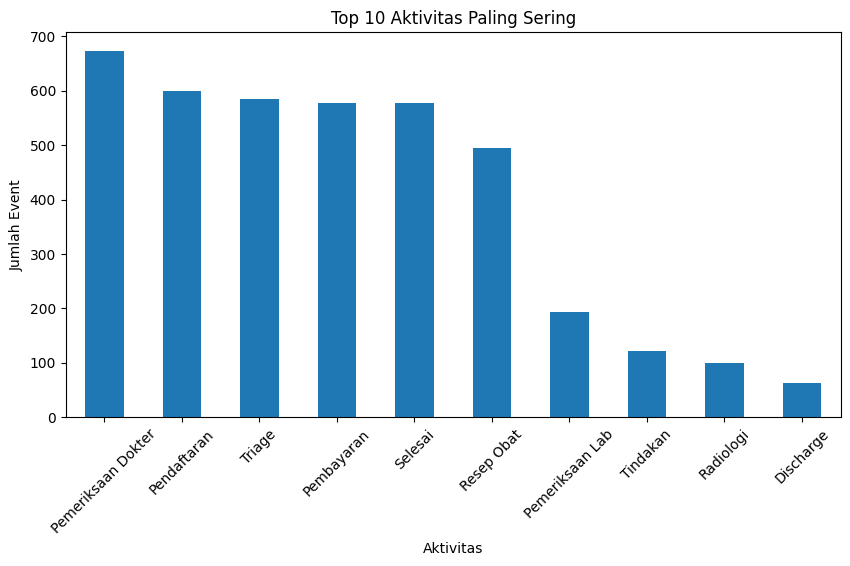

In [6]:
top_aktivitas = df['activity'].value_counts().head(10)

top_aktivitas.plot(kind='bar')
plt.title('Top 10 Aktivitas Paling Sering')
plt.xlabel('Aktivitas')
plt.ylabel('Jumlah Event')
plt.xticks(rotation=45)
plt.show()

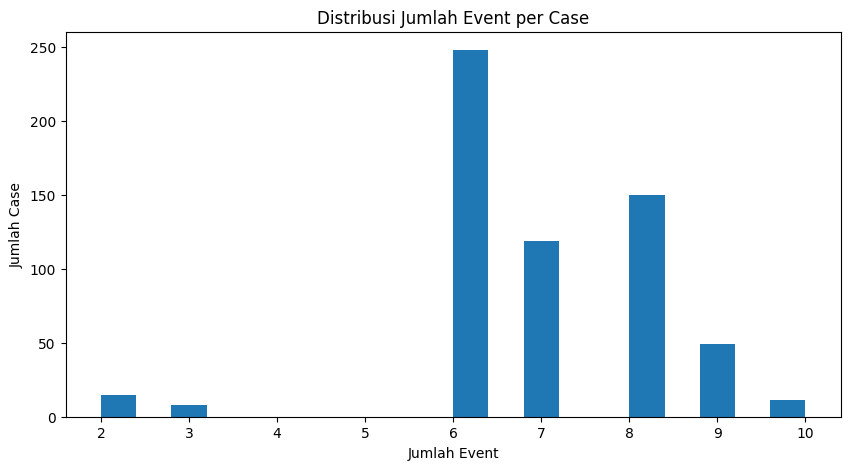

In [7]:
event_per_case = df.groupby('case_id').size()

event_per_case.plot(kind='hist', bins=20)
plt.title('Distribusi Jumlah Event per Case')
plt.xlabel('Jumlah Event')
plt.ylabel('Jumlah Case')
plt.show()

In [8]:
# hitung waktu mulai & selesai tiap case
case_duration = df.groupby('case_id')['timestamp'].agg(['min', 'max'])

# durasi dalam jam
case_duration['duration_hours'] = (
    case_duration['max'] - case_duration['min']
).dt.total_seconds() / 3600

case_duration.head()

,min,max,duration_hours
case_id,,,
RS-00001,2025-12-11 19:17:08,2025-12-12 07:48:34,12.523889
RS-00002,2025-12-14 07:55:10,2025-12-14 13:33:10,5.633333
RS-00003,2025-12-24 10:08:11,2025-12-24 18:16:11,8.133333
RS-00004,2025-12-25 09:10:04,2025-12-28 13:54:04,76.733333
RS-00005,2025-12-23 20:56:43,2025-12-24 07:44:07,10.790000


from matplotlib import pyplot as plt
_df_0['duration_hours'].plot(kind='hist', bins=20, title='duration_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['duration_hours']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('duration_hours')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['min']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'min'}, axis=1)
              .sort_values('min', ascending=True))
  xs = counted['min']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['max']
  ys = series['duration_hours']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('max', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('max')
_ = plt.ylabel('duration_hours')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['max']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'max'}, axis=1)
              .sort_values('max', ascending=True))
  xs = counted['max']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('max', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('max')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['duration_hours'].plot(kind='line', figsize=(8, 4), title='duration_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

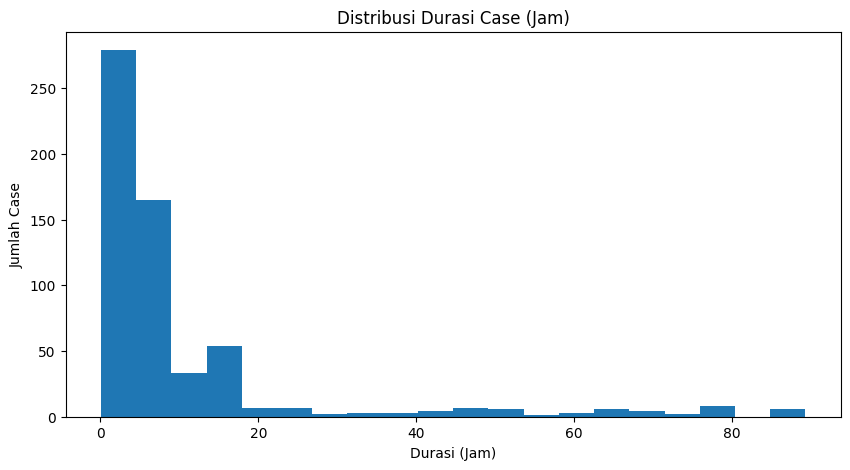

In [9]:
case_duration['duration_hours'].plot(kind='hist', bins=20)
plt.title('Distribusi Durasi Case (Jam)')
plt.xlabel('Durasi (Jam)')
plt.ylabel('Jumlah Case')
plt.show()

In [10]:
rata_rata = case_duration['duration_hours'].mean()
median = case_duration['duration_hours'].median()

print("Rata-rata durasi case (jam):", round(rata_rata, 2))
print("Median durasi case (jam):", round(median, 2))

Rata-rata durasi case (jam): 10.93
Median durasi case (jam): 4.88


In [11]:
case_tercepat = case_duration.sort_values('duration_hours').head(5)
case_terlama = case_duration.sort_values('duration_hours', ascending=False).head(5)

print("5 Case Tercepat")
display(case_tercepat)

print("\n5 Case Terlama")
display(case_terlama)

5 Case Tercepat


,min,max,duration_hours
case_id,,,
RS-00130,2025-10-14 07:24:52,2025-10-14 07:27:52,0.050000
RS-00134,2025-12-26 07:34:34,2025-12-26 07:37:34,0.050000
RS-00240,2025-11-26 20:56:08,2025-11-26 21:00:08,0.066667
RS-00220,2025-11-30 07:29:38,2025-11-30 07:37:38,0.133333
RS-00103,2025-10-14 12:21:34,2025-10-14 12:30:34,0.150000



5 Case Terlama


,min,max,duration_hours
case_id,,,
RS-00508,2025-12-01 14:20:53,2025-12-05 07:39:54,89.316944
RS-00204,2025-11-26 17:04:27,2025-11-30 08:09:50,87.089722
RS-00487,2025-11-24 18:33:11,2025-11-28 09:03:55,86.512222
RS-00255,2025-10-05 17:50:32,2025-10-09 08:11:43,86.353056
RS-00264,2025-12-05 19:15:19,2025-12-09 08:54:48,85.658056


from matplotlib import pyplot as plt
case_tercepat['duration_hours'].plot(kind='hist', bins=20, title='duration_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['min']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'min'}, axis=1)
              .sort_values('min', ascending=True))
  xs = counted['min']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = case_tercepat.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['max']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'max'}, axis=1)
              .sort_values('max', ascending=True))
  xs = counted['max']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = case_tercepat.sort_values('max', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('max')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['duration_hours']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'duration_hours'}, axis=1)
              .sort_values('duration_hours', ascending=True))
  xs = counted['duration_hours']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = case_tercepat.sort_values('duration_hours', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('duration_hours')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
case_tercepat['duration_hours'].plot(kind='line', figsize=(8, 4), title='duration_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
case_terlama['duration_hours'].plot(kind='hist', bins=20, title='duration_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['duration_hours']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = case_terlama.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('duration_hours')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['min']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'min'}, axis=1)
              .sort_values('min', ascending=True))
  xs = counted['min']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = case_terlama.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['max']
  ys = series['duration_hours']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = case_terlama.sort_values('max', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('max')
_ = plt.ylabel('duration_hours')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['max']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'max'}, axis=1)
              .sort_values('max', ascending=True))
  xs = counted['max']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = case_terlama.sort_values('max', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('max')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
case_terlama['duration_hours'].plot(kind='line', figsize=(8, 4), title='duration_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

✍️ Narasi

Analisis eksplorasi proses menunjukkan bahwa beberapa aktivitas seperti pendaftaran dan pemeriksaan merupakan aktivitas yang paling sering terjadi.
Distribusi jumlah event per case memperlihatkan variasi kompleksitas proses pasien.
Durasi case bervariasi cukup signifikan, dengan beberapa case selesai dalam waktu singkat, sementara case lain memerlukan waktu lebih lama, yang mengindikasikan potensi bottleneck dalam proses layanan rumah sakit.